In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv")                       
df = data.copy()

In [15]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [16]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [17]:
df.head()

,Date,Cumulative_cases
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


In [18]:
print(df['Date'])

0     22-01-2020
1     23-01-2020
2     24-01-2020
3     25-01-2020
4     26-01-2020
         ...    
66    28-03-2020
67    29-03-2020
68    30-03-2020
69    31-03-2020
70    01-04-2020
Name: Date, Length: 71, dtype: object


In [19]:
import datetime

In [20]:
#df.set_index('Date',inplace=True) #set date as the index

In [21]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='ignore')
print(df['Date'])

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
66   2020-03-28
67   2020-03-29
68   2020-03-30
69   2020-03-31
70   2020-04-01
Name: Date, Length: 71, dtype: datetime64[ns]


In [22]:
df.set_index('Date',inplace=True) #set date as the index

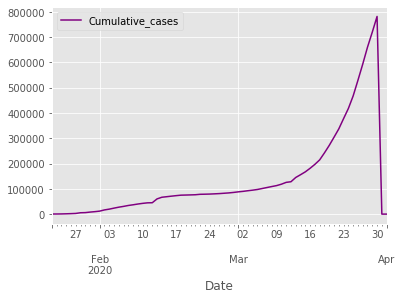

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

df.plot(color="purple")

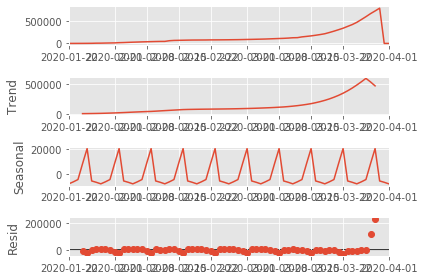

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)
fig = result.plot()

In [26]:
df= df['2020-01-22':'2020-03-30']

In [27]:
from fbprophet import Prophet
model = Prophet()
train_df = df.rename(columns={"Cumulative_cases":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


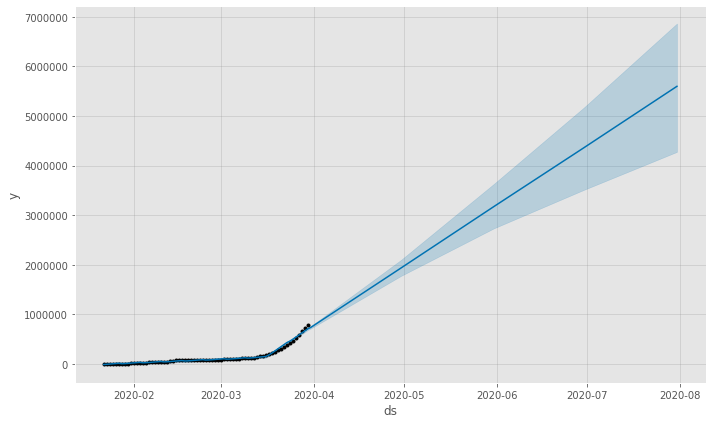

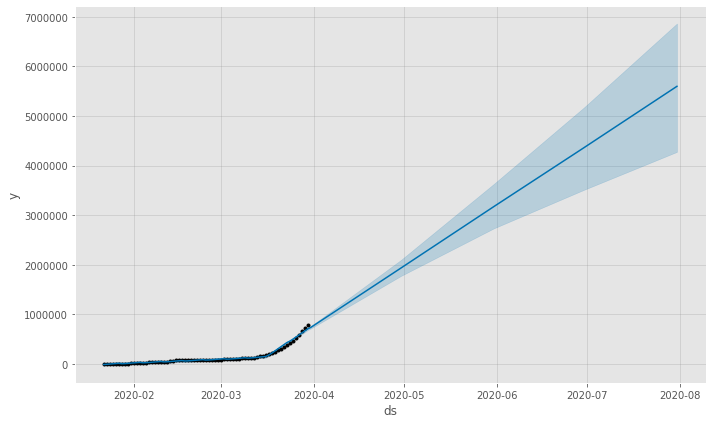

In [28]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 5 months
future = model.make_future_dataframe(5, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)

In [54]:
#Another dataset

In [55]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [56]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\1\covid_19.csv")                       
df = data.copy()

In [57]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Confirmed' : confirmed_cases}
df = pd.DataFrame(df)

In [58]:
cases = df.reset_index()

In [59]:
cases.head()

,index,Date,Confirmed
0,0,1/22/20,555
1,1,1/23/20,654
2,2,1/24/20,941
3,3,1/25/20,1434
4,4,1/26/20,2118


In [63]:
import datetime

In [66]:
cases['Date']=pd.to_datetime(cases['Date'], format='%d-%m-%Y', errors='ignore')
print(cases['Date'])

0     1/22/20
1     1/23/20
2     1/24/20
3     1/25/20
4     1/26/20
       ...   
91    4/22/20
92    4/23/20
93    4/24/20
94    4/25/20
95    4/26/20
Name: Date, Length: 96, dtype: object


In [6]:
df=cases.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [7]:
df1=cases.drop(['Date','index'],axis=1)

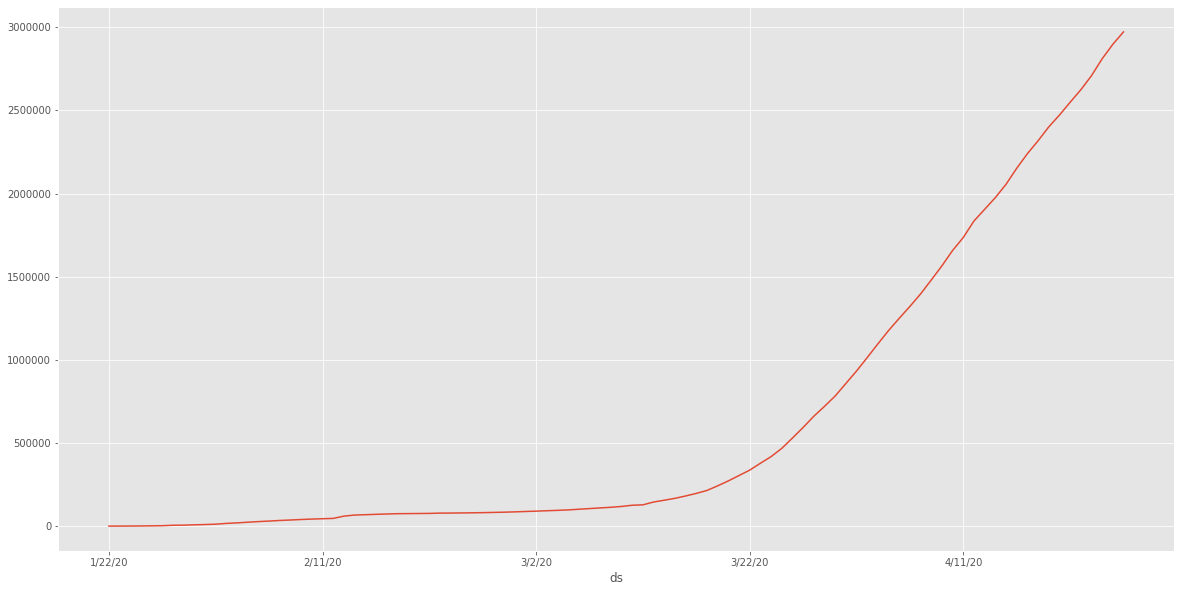

In [8]:

df.set_index('ds').y.plot()

In [9]:
df['y'] = np.log(df['y'])

In [10]:
df.tail()

,index,ds,y
91,91,4/22/20,14.779846
92,92,4/23/20,14.811619
93,93,4/24/20,14.848515
94,94,4/25/20,14.879096
95,95,4/26/20,14.904567


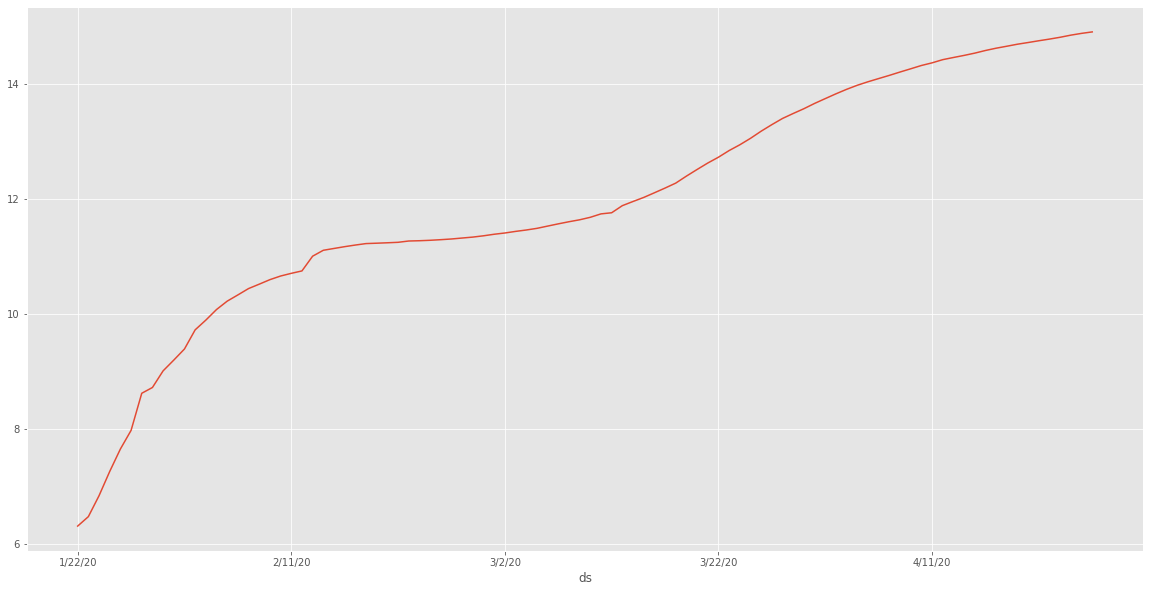

In [11]:
df.set_index('ds').y.plot()

In [12]:
model = Prophet()
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
weekly_seasonality=True

In [14]:

future = model.make_future_dataframe(periods=30, freq = 'd')
future.tail()

,ds
121,2020-05-22
122,2020-05-23
123,2020-05-24
124,2020-05-25
125,2020-05-26


In [15]:
forecast = model.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
121,2020-05-22,15.998277,14.587900,17.478822,14.577169,17.463296,0.002427,0.002427,0.002427,0.002427,0.002427,0.002427,0.0,0.0,0.0,16.000704
122,2020-05-23,16.038525,14.527088,17.579188,14.521112,17.590639,-0.003591,-0.003591,-0.003591,-0.003591,-0.003591,-0.003591,0.0,0.0,0.0,16.034934
123,2020-05-24,16.078773,14.451013,17.730596,14.462566,17.697406,0.000286,0.000286,0.000286,0.000286,0.000286,0.000286,0.0,0.0,0.0,16.079058
124,2020-05-25,16.119020,14.364200,17.826407,14.402397,17.850111,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,0.0,0.0,0.0,16.107740
125,2020-05-26,16.159268,14.342163,17.957252,14.359084,17.945354,0.008291,0.008291,0.008291,0.008291,0.008291,0.008291,0.0,0.0,0.0,16.167559


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2020-05-22,16.000704,14.587900,17.478822
122,2020-05-23,16.034934,14.527088,17.579188
123,2020-05-24,16.079058,14.451013,17.730596
124,2020-05-25,16.107740,14.364200,17.826407
125,2020-05-26,16.167559,14.342163,17.957252


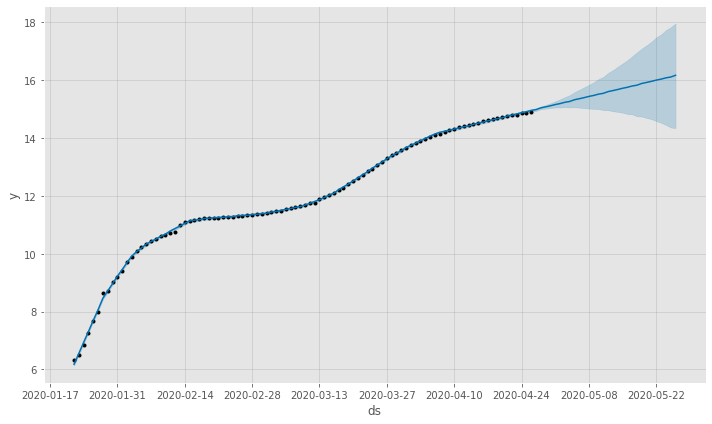

In [18]:
model.plot(forecast);

In [213]:
#df.set_index('ds', inplace=True)
#forecast.set_index('ds', inplace=True)

In [19]:
viz_df = df1.join(forecast[['ds','yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [20]:

viz_df.head()

,Confirmed,ds,yhat,yhat_lower,yhat_upper
0,555.0,2020-01-22,6.178545,6.130658,6.227811
1,654.0,2020-01-23,6.555675,6.502683,6.604110
2,941.0,2020-01-24,6.937819,6.890956,6.983983
3,1434.0,2020-01-25,7.311945,7.264451,7.360574
4,2118.0,2020-01-26,7.696179,7.651692,7.744482


In [21]:

viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [22]:
viz_df.head()

,Confirmed,ds,yhat,yhat_lower,yhat_upper,yhat_rescaled
0,555.0,2020-01-22,6.178545,6.130658,6.227811,482.289616
1,654.0,2020-01-23,6.555675,6.502683,6.604110,703.223734
2,941.0,2020-01-24,6.937819,6.890956,6.983983,1030.519944
3,1434.0,2020-01-25,7.311945,7.264451,7.360574,1498.087773
4,2118.0,2020-01-26,7.696179,7.651692,7.744482,2199.925933


In [23]:
#df.set_index('ds', inplace=True)
viz_df.set_index('ds', inplace=True)

In [24]:
viz_df.head()

,Confirmed,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
2020-01-22,555.0,6.178545,6.130658,6.227811,482.289616
2020-01-23,654.0,6.555675,6.502683,6.604110,703.223734
2020-01-24,941.0,6.937819,6.890956,6.983983,1030.519944
2020-01-25,1434.0,7.311945,7.264451,7.360574,1498.087773
2020-01-26,2118.0,7.696179,7.651692,7.744482,2199.925933


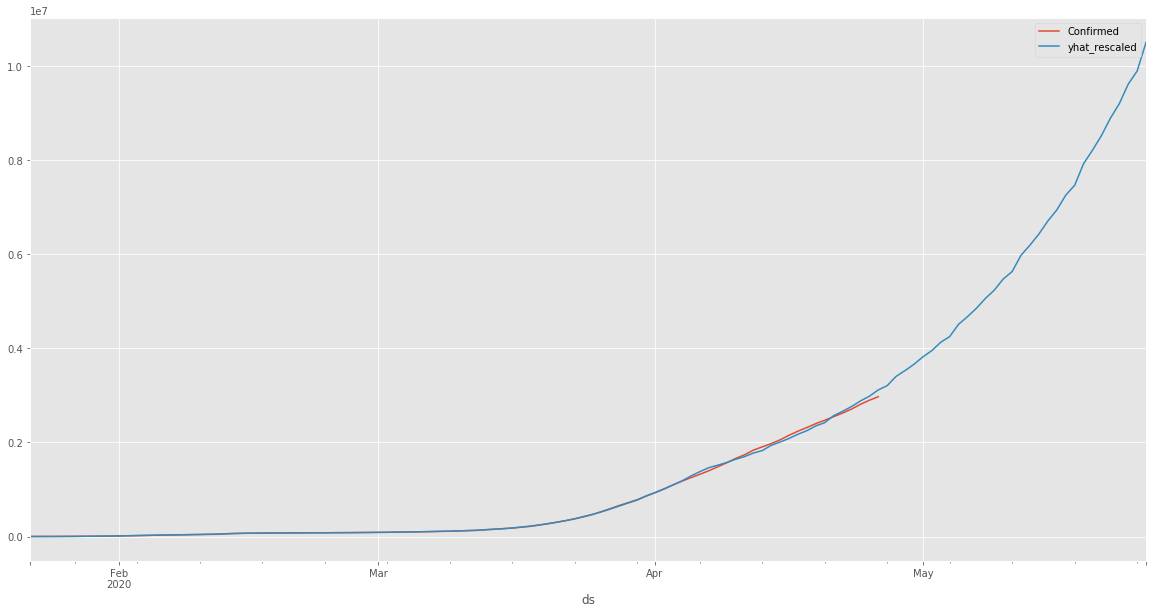

In [25]:
viz_df[['Confirmed', 'yhat_rescaled']].plot()

In [190]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv")                       
df = data.copy()

In [191]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [192]:
df.head()

,Date,Cumulative_cases
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


In [193]:
print(df['Date'])

0     22-01-2020
1     23-01-2020
2     24-01-2020
3     25-01-2020
4     26-01-2020
         ...    
66    28-03-2020
67    29-03-2020
68    30-03-2020
69    31-03-2020
70    01-04-2020
Name: Date, Length: 71, dtype: object


In [194]:
import datetime


In [195]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='ignore')
print(df['Date'])

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
66   2020-03-28
67   2020-03-29
68   2020-03-30
69   2020-03-31
70   2020-04-01
Name: Date, Length: 71, dtype: datetime64[ns]


In [196]:
df.set_index('Date',inplace=True) #set date as the index

In [197]:
df= df['2020-01-22':'2020-03-30']

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


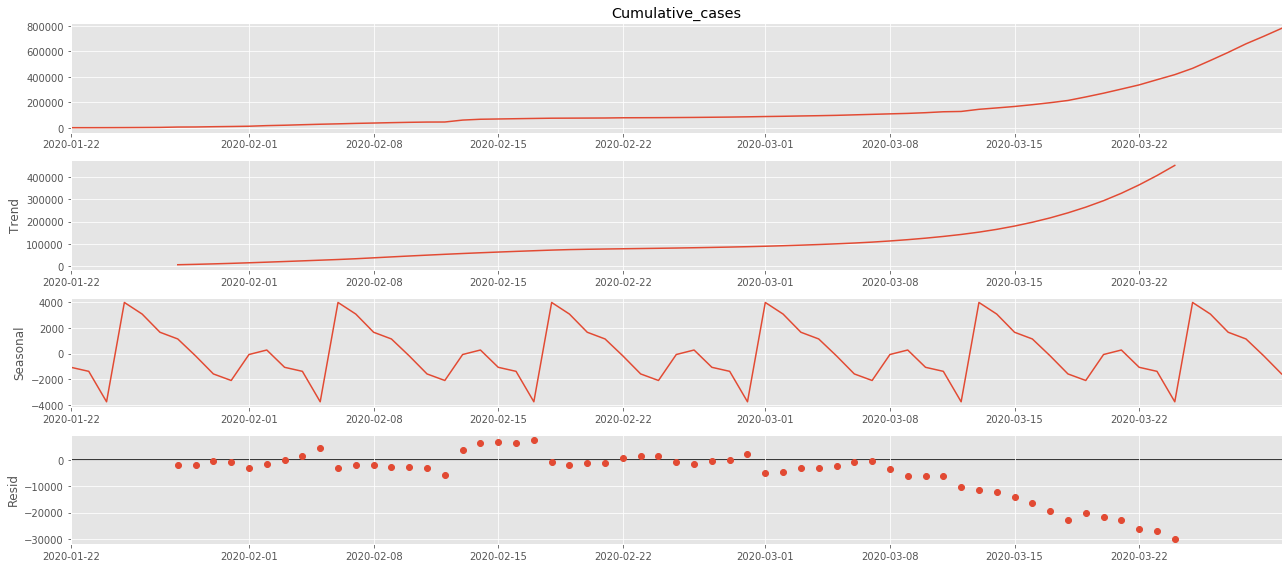

In [198]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Cumulative_cases'], freq=12)
decomposition.plot()
plt.show()

In [199]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Cumulative_cases'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  2.139706
p-value                         0.998829
#Lags Used                      1.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature.csv")                       
df = data.copy()

In [3]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [4]:
print(df['Date'])

0     22-01-2020
1     23-01-2020
2     24-01-2020
3     25-01-2020
4     26-01-2020
         ...    
66    28-03-2020
67    29-03-2020
68    30-03-2020
69    31-03-2020
70    01-04-2020
Name: Date, Length: 71, dtype: object


In [5]:
import datetime

In [6]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='ignore')
print(df['Date'])

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
66   2020-03-28
67   2020-03-29
68   2020-03-30
69   2020-03-31
70   2020-04-01
Name: Date, Length: 71, dtype: datetime64[ns]


In [7]:
df.set_index('Date',inplace=True) #set date as the index

In [8]:
df= df['2020-01-22':'2020-03-30']

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


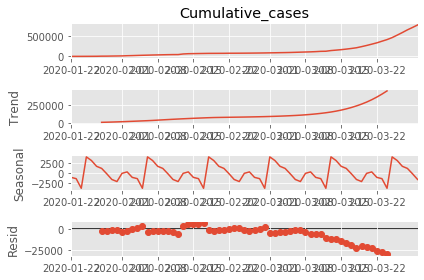

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Cumulative_cases'], freq=12)
decomposition.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Cumulative_cases'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  2.139706
p-value                         0.998829
#Lags Used                      1.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [15]:
df_diff = df.diff().diff(12).dropna()

In [17]:
import pmdarima as pm
model = pm.auto_arima(df['Cumulative_cases'], d=1, D=1,
                      m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1235.754, Time=5.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1248.008, Time=0.09 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=3.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1220.603, Time=2.40 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1201.801, Time=1.31 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1202.676, Time=8.46 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1222.343, Time=2.45 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1118.857, Time=3.21 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1112.616, Time=12.93 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1114.819, Time=14.62 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1115.120, Time=10.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.27 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1116.731, Time=28.87 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1114.522, Time=13.64 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1116.049, Time=10.68 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=5.57 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1212.007, Time=2.51 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=8.14 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=13.24 sec


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=1112.616, Time=9.59 sec

Best model:  ARIMA(1,1,1)(1,1,0)[12] intercept
Total fit time: 164.631 seconds


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['Cumulative_cases'],
                order=(1,1,1),seasonal_order=(1,1,0,12))
results = model.fit()
results.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    Cumulative_cases   No. Observations:                   69
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -552.795
Date:                             Wed, 05 Aug 2020   AIC                           1113.590
Time:                                     17:28:38   BIC                           1121.691
Sample:                                 01-22-2020   HQIC                          1116.731
                                      - 03-30-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.025     39.271      0.000       0.950       1.050
ma.L1         -0.1674      0.162     -1.035      0.301      -0.484       0.150
ar.S.L12      -0.5076      0.134     -3.787      0.000      -0.770      -0.245
sigma2      2.211e+07   3.67e-09   6.03e+15      0.000    2.21e+07    2.21e+07
===================================================================================
Ljung-Box (Q):                       29.34   Jarque-Bera (JB):                25.11
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             1.01
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+31. Standard errors may be unstable.
"""

In [26]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0535      0.021     49.793      0.000       1.012       1.095
ma.L1         -0.2404      0.273     -0.879      0.379      -0.776       0.296
ar.S.L12      -0.5256      0.167     -3.147      0.002      -0.853      -0.198
sigma2      2.597e+07   3.99e-09   6.51e+15      0.000     2.6e+07     2.6e+07


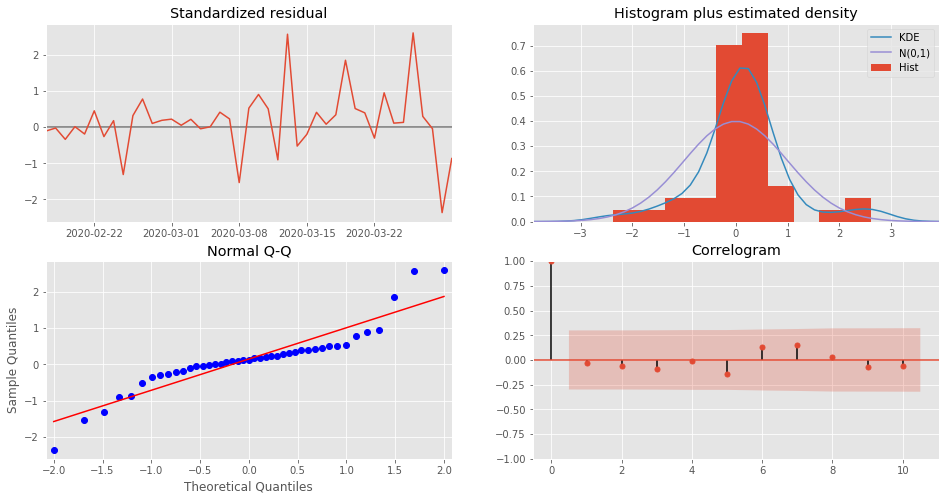

In [27]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

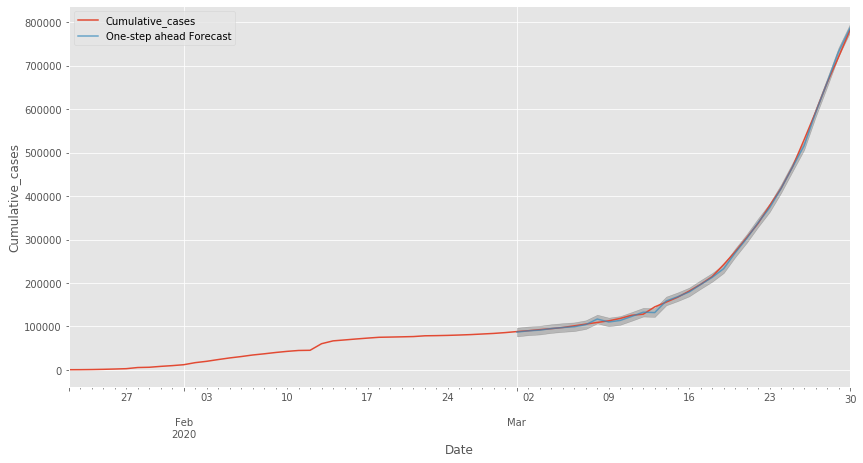

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2020-01-22':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative_cases')
plt.legend()
plt.show()